In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Ajuste de curvas

A regressão linear permite encontrar a melhor **reta** que se ajusta a um conjunto de pontos fornecidos.

Veremos agora como ajustar o conjunto de pontos no caso de modelo não-lineares.

* Linearização de modelos não-lineares (modelo exponencial)

# Linearização de modelos não-lineares (modelo exponencial)

Suponha que o modelo tenha a forma de uma curva exponencial:

\begin{equation}
y = \alpha e^{\beta x}
\end{equation}

onde $\alpha$ e $\beta$ são os parâmetros a serem estimados.

Diversos sistemas apresentam este comportamento, como o crescimento populacional, o decaimento radioativo dentre outros.

Podemos **linearizar** o modelo tomando-se o logaritmo de ambos os lados e obtendo:

\begin{equation}
\ln y = \ln \alpha + \beta x
\end{equation}

Observe que este modelo apresenta a equação de uma reta:

\begin{equation}
Y = \theta_0 + \theta_1x
\end{equation}

onde $Y = \ln y$, $\theta_0 = \ln \alpha$ e $\theta_1 = \beta$ e assim podemos utilizar o método dos mínimos quadrados no modelo linearizado.


## Exemplo

Considere um experimento que mediu o decaimento de um material radioativo.
À medida que o tempo passa, ele emite partículas e sua massa diminui.
A emissão, por sua vez, depende da massa e também diminui com o passar do tempo, seguindo uma **curva exponencial**.
Os dados coletados de massa e tempo encontram-se na tabela abaixo:

| Tempo (x) | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Massa (y) | 8100 | 6420 | 4960 | 3190 | 2530 | 2070 | 1800 | 1620 | 1380 |

1. Plote o gráfico dos pontos coletados (tempo no eixo $x$ e massa no eixo $y$).
2. Em seguida, plote novamente utilizando o eixo semi-log.
3. Calcule os valores de $\ln y$ e plote o gráfico de $\ln y \times x$
4. Faça a linearização e encontre os parâmetros que melhor se ajustam a curva $y = \alpha e^{\beta x}$.
5. Plote o gráfico da curva obtida pelo método dos mínimos quadrados
6. Estime a massa no tempo $t = 10$

<Figure size 432x288 with 0 Axes>

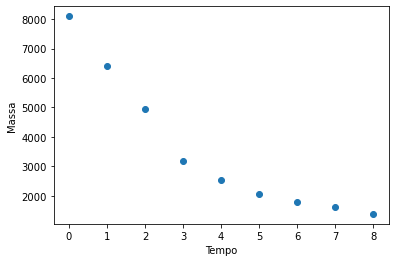

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tempo = [0, 1, 2, 3, 4, 5, 6, 7, 8]
massa = [8100, 6420, 4960, 3190, 2530, 2070, 1800, 1620, 1380]

X = np.array(tempo)
Y = np.array(massa)

# 1. Plote o gráfico dos pontos coletados (tempo no eixo  𝑥  e massa no eixo  𝑦 ).
plt.scatter(X, Y)
plt.xlabel('Tempo')
plt.ylabel('Massa')
plt.figure()

Text(0, 0.5, 'Massa (log)')

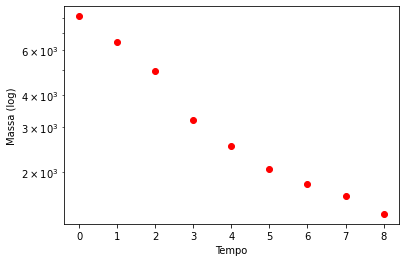

In [3]:
# 2. Em seguida, plote novamente utilizando o eixo semi-log.
plt.semilogy(X, Y, 'or')
plt.xlabel('Tempo')
plt.ylabel('Massa (log)')

Text(0, 0.5, 'Massa (log)')

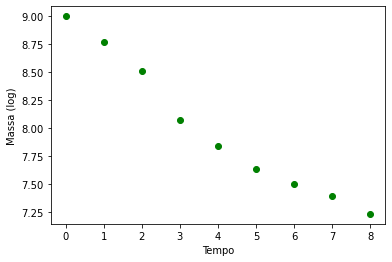

In [4]:
# 3. Calcule os valores de  ln(y)  e plote o gráfico de  ln(y) x x
LNY = np.log(Y)
plt.figure()
plt.scatter(X, LNY, c='g')
plt.xlabel('Tempo')
plt.ylabel('Massa (log)')

In [5]:
# 4. Faça a linearização e encontre os parâmetros que melhor se ajustam a curva  y=alpha e^{betax}
from scipy import stats

mod = stats.linregress(X, LNY)

# o valor obtido foi de th1 = ln(alpha). Para achar o valor de alpha fazemos:
alpha = np.exp(mod.intercept)
beta = mod.slope
print(f'A equação obtida foi: y = {alpha:.4f}e^{beta:.4f}x')

A equação obtida foi: y = 7358.4618e^-0.2278x


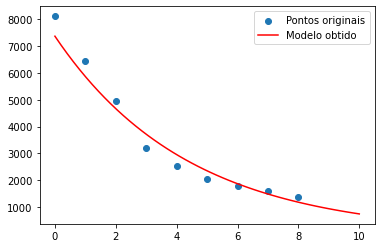

In [9]:
# 5. Plote o gráfico da curva obtida pelo método dos mínimos quadrados
Xr = np.linspace(0, 10)
Yr = alpha*np.exp(Xr*beta)
plt.figure()
plt.scatter(X, Y)
plt.plot(Xr, Yr, 'r')
plt.legend(['Pontos originais', 'Modelo obtido'])

In [15]:
# 6. Estime a massa no tempo t = 10
t = 10
y = alpha*np.exp(beta*t)
print(f'A massa estimada é de {y:.3f}')

A massa estimada é de 753.934


# Exercício

Suponha que um determinado fenômeno obedece ao modelo $P(t) = P_0 e^{-\lambda/t}$.
Considerando os valores de $P$ e $t$ abaixo, faça o que se pede: 

\begin{array}{|c|c|} \hline
P & t \\ \hline
2,5 & 261 \\
6,1 & 280 \\
10,1 & 290 \\
31,3 & 302 \\
44,1 & 310 \\
80,0 & 322 \\
150,0 & 331 \\
260,0 & 340 \\ \hline
\end{array}

1. Linearize o modelo.
2. Determine os valores de $P_0$ e $\lambda$ utilizando regressão linear.
3. Plote os pontos originais.
4. Plote o gráfico da curva $P(t) = P_0 e^{-\lambda/t}$ estimada.